In [16]:
import pandas as pd
train_data=pd.read_csv('/content/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test_data=pd.read_csv('/content/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
data=[train_data,test_data]
for dataset in data:
  dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [19]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
train_data.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [21]:
train_data.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [22]:
data1=[train_data,test_data]
for dataset in data1:
  total=dataset.isnull().sum()
  percent=(dataset.isnull().sum()/dataset.isnull().count()*100)
  #print(total)
  #print(percent)
  ms=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
  #print(ms)
  ms=ms[ms['Percent']>0]
  print(ms)

          Total    Percent
Age         177  19.865320
Cabin       687  77.104377
Embarked      2   0.224467
       Total    Percent
Age       86  20.574163
Fare       1   0.239234
Cabin    327  78.229665


In [23]:
import numpy as np
start=', '
end='. '
desig=[]
#len(start)
for dataset in data1:
  desig=[]
  #print(dataset)
  for s in dataset.Name:
     desig.append(s[s.find(start)+len(start):s.find(end)])
  desig=np.array(desig)
  dataset.Name=desig
train_data.Name.head()
     

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [24]:
test_data.Name.head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Name, dtype: object

In [25]:
data=pd.concat([train_data.drop(columns=['Survived']),test_data])
data.shape

(1309, 11)

In [26]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data.groupby(['Name']).agg({'Age':'median'})

,Age
Name,
Capt,70.0
Col,54.5
Don,40.0
Dona,39.0
Dr,49.0
Jonkheer,38.0
Lady,48.0
Major,48.5
Master,4.0


In [29]:
data.groupby(['Name']).Age.median()

Name
Capt            70.0
Col             54.5
Don             40.0
Dona            39.0
Dr              49.0
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           4.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              29.0
Mrs             35.5
Ms              28.0
Rev             41.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [30]:
mapping=data['Name'].map(data.groupby(['Name']).Age.median())
mapping

0      29.0
1      35.5
2      22.0
3      35.5
4      29.0
       ... 
413    29.0
414    39.0
415    29.0
416    29.0
417     4.0
Name: Name, Length: 1309, dtype: float64

In [31]:
mapping[0:1200]

0      29.0
1      35.5
2      22.0
3      35.5
4      29.0
       ... 
304    22.0
305    35.5
306    29.0
307     4.0
308    29.0
Name: Name, Length: 1200, dtype: float64

In [32]:
mapping.shape

(1309,)

In [33]:
data['Name']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 1309, dtype: object

In [34]:
data[['Name','Age']]

,Name,Age
0,Mr,22.0
1,Mrs,38.0
2,Miss,26.0
3,Mrs,35.0
4,Mr,35.0
...,...,...
413,Mr,NaN
414,Dona,39.0
415,Mr,38.5
416,Mr,NaN


In [35]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
mapping[0:len(train_data)]

0      29.0
1      35.5
2      22.0
3      35.5
4      29.0
       ... 
886    41.5
887    22.0
888    22.0
889    29.0
890    29.0
Name: Name, Length: 891, dtype: float64

In [37]:
train_data.Age.fillna(value=mapping[0:len(train_data)],inplace=True)

In [38]:
train_data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [39]:
train_data[['Name','Age']]

,Name,Age
0,Mr,22.0
1,Mrs,38.0
2,Miss,26.0
3,Mrs,35.0
4,Mr,35.0
...,...,...
886,Rev,27.0
887,Miss,19.0
888,Miss,22.0
889,Mr,26.0


In [40]:
data[['Name','Age']]

,Name,Age
0,Mr,22.0
1,Mrs,38.0
2,Miss,26.0
3,Mrs,35.0
4,Mr,35.0
...,...,...
413,Mr,NaN
414,Dona,39.0
415,Mr,38.5
416,Mr,NaN


In [41]:
test_data.Age.fillna(value=mapping[len(train_data):],inplace=True)

In [42]:
train_data.Age.isnull().sum()

0

In [43]:
data1=[train_data,test_data]

In [44]:
test_data.Fare.fillna(value=50,inplace=True)

In [45]:
train_data.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
B4             1
A31            1
B73            1
B38            1
B37            1
Name: Cabin, Length: 147, dtype: int64

In [46]:
train_data.groupby('Cabin').agg({'Survived':'mean'})

,Survived
Cabin,
A10,0.0
A14,0.0
A16,1.0
A19,0.0
A20,1.0
...,...
F33,1.0
F38,0.0
F4,1.0


In [47]:
mapping=train_data.groupby(['Cabin']).Survived.mean().astype(int)
mapping

Cabin
A10    0
A14    0
A16    1
A19    0
A20    1
      ..
F33    1
F38    0
F4     1
G6     0
T      0
Name: Survived, Length: 147, dtype: int64

In [48]:
 data1=[train_data,test_data]
for dataset in data1:
  dataset.Cabin=dataset.Cabin.map(mapping)
  




In [49]:
train_data['Cabin']

0      NaN
1      1.0
2      NaN
3      0.0
4      NaN
      ... 
886    NaN
887    1.0
888    NaN
889    1.0
890    NaN
Name: Cabin, Length: 891, dtype: float64

In [50]:
test_data['Cabin']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Cabin, Length: 418, dtype: float64

In [51]:
test_data.Cabin.value_counts()

1.0    28
0.0    17
Name: Cabin, dtype: int64

In [52]:
train_data.Cabin.fillna(value=2,inplace=True)

In [53]:
test_data.Cabin.fillna(value=2,inplace=True)

In [54]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [55]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [56]:
train_data.Embarked.fillna(method='ffill',inplace=True)

In [57]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [58]:
train_data[['Cabin']]

,Cabin
0,2.0
1,1.0
2,2.0
3,0.0
4,2.0
...,...
886,2.0
887,1.0
888,2.0
889,1.0


In [59]:
test_data[['Cabin']]

,Cabin
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
413,2.0
414,2.0
415,2.0
416,2.0


In [60]:
train_data.Embarked.value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [61]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [62]:
train_data.Ticket.value_counts()

1601        7
347082      7
CA. 2343    7
347088      6
3101295     6
           ..
349201      1
392091      1
2700        1
315084      1
348124      1
Name: Ticket, Length: 681, dtype: int64

In [63]:
dicty={'male':0,'female':1}
train_data['Sex']=train_data['Sex'].map(dicty)

In [64]:
test_data['Sex']=test_data['Sex'].map(dicty)

In [65]:
set(train_data.Embarked)

{'C', 'Q', 'S'}

In [66]:
dicty={}
for count,obj in enumerate(set(train_data.Embarked)):
  #print(count,obj)
  dicty[obj]=count
print(dicty)  

{'S': 0, 'C': 1, 'Q': 2}


In [67]:
train_data['Embarked']=train_data['Embarked'].map(dicty)

In [68]:
test_data['Embarked']=test_data['Embarked'].map(dicty)

In [69]:
train_data=pd.concat([train_data,pd.get_dummies(train_data.Pclass,prefix='P')],axis=1)

In [70]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,P_1,P_2,P_3
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0,1
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,1.0,1,1,0,0
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,0,0,1
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,0.0,0,1,0,0
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,2.0,0,0,0,1


In [71]:
test_data=pd.concat([test_data,pd.get_dummies(test_data.Pclass,prefix='P')],axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,P_1,P_2,P_3
0,892,3,Mr,0,34.5,0,0,330911,7.8292,2.0,2,0,0,1
1,893,3,Mrs,1,47.0,1,0,363272,7.0000,2.0,0,0,0,1
2,894,2,Mr,0,62.0,0,0,240276,9.6875,2.0,2,0,1,0
3,895,3,Mr,0,27.0,0,0,315154,8.6625,2.0,0,0,0,1
4,896,3,Mrs,1,22.0,1,1,3101298,12.2875,2.0,0,0,0,1


In [72]:
data.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
347077           7
                ..
9232             1
342441           1
368703           1
349205           1
364850           1
Name: Ticket, Length: 929, dtype: int64

In [73]:
data.Ticket.count()

1309

In [74]:
mapping=data.groupby(['Ticket']).Ticket.count()
mapping

Ticket
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Name: Ticket, Length: 929, dtype: int64

In [75]:
data.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
347077           7
                ..
9232             1
342441           1
368703           1
349205           1
364850           1
Name: Ticket, Length: 929, dtype: int64

In [76]:
train_data['Friends']=train_data['Ticket'].map(mapping)-1
train_data['Friends']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Friends, Length: 891, dtype: int64

In [77]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,P_1,P_2,P_3,Friends
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0,1,0
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,1.0,1,1,0,0,1
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,0,0,1,0
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,0.0,0,1,0,0,1
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,2.0,0,0,0,1,0


In [78]:
test_data['Friends']=test_data.Ticket.map(mapping)-1
test_data['Friends']

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    2
415    0
416    0
417    2
Name: Friends, Length: 418, dtype: int64

In [79]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,P_1,P_2,P_3,Friends
0,892,3,Mr,0,34.5,0,0,330911,7.8292,2.0,2,0,0,1,0
1,893,3,Mrs,1,47.0,1,0,363272,7.0000,2.0,0,0,0,1,0
2,894,2,Mr,0,62.0,0,0,240276,9.6875,2.0,2,0,1,0,0
3,895,3,Mr,0,27.0,0,0,315154,8.6625,2.0,0,0,0,1,0
4,896,3,Mrs,1,22.0,1,1,3101298,12.2875,2.0,0,0,0,1,1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


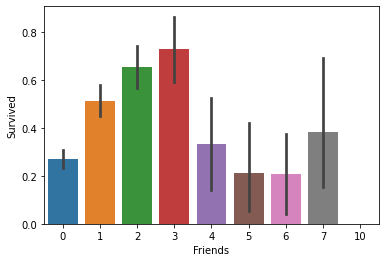

In [80]:
import seaborn as sns
sns.barplot(train_data.Friends,train_data.Survived)

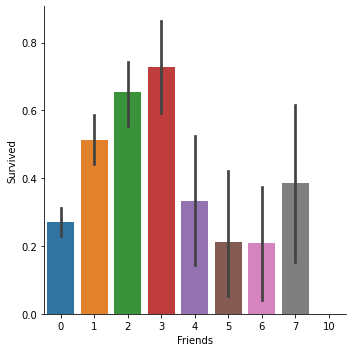

In [81]:
sns.catplot(x=('Friends'),y=('Survived'),kind='bar',data=train_data)

In [ ]:
#Alone

In [82]:
data1=[train_data,test_data]
def isalone(x):
  if (x>0):
    return 0
  else:
    return 1
for dataset in data1:
  dataset['alone']=dataset.Parch+dataset.SibSp+dataset.Friends
  dataset.alone=dataset.alone.apply(isalone)
dataset['alone']      
  


0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    0
Name: alone, Length: 418, dtype: int64

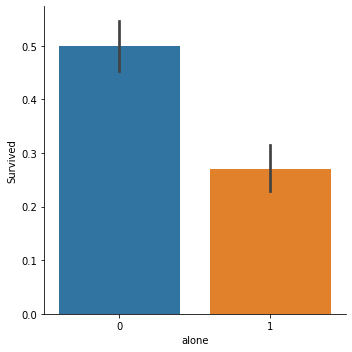

In [83]:
sns.catplot(x='alone',y='Survived',kind='bar',data=train_data)

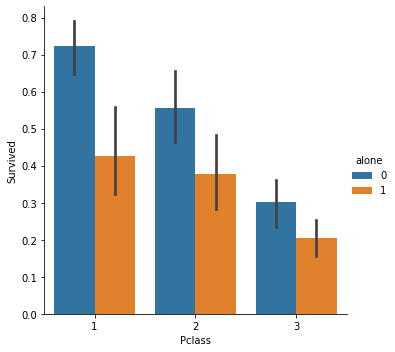

In [84]:
sns.catplot(x='Pclass',y='Survived',hue='alone',kind='bar',data=train_data)

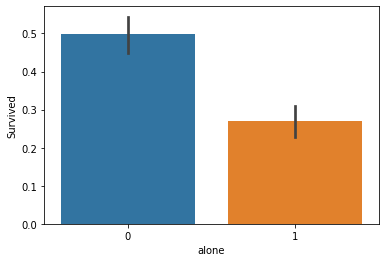

In [85]:
sns.barplot(train_data.alone,train_data.Survived)

In [86]:
set(train_data.Age)

{0.42,
 0.67,
 0.75,
 0.83,
 0.92,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 14.5,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 20.5,
 21.0,
 22.0,
 23.0,
 23.5,
 24.0,
 24.5,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 30.0,
 30.5,
 31.0,
 32.0,
 32.5,
 33.0,
 34.0,
 34.5,
 35.0,
 35.5,
 36.0,
 36.5,
 37.0,
 38.0,
 39.0,
 40.0,
 40.5,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 55.5,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 70.0,
 70.5,
 71.0,
 74.0,
 80.0}

In [87]:
#binning
for dataset in data1:
  dataset.loc[dataset['Age']<=18,'Age']=0
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=35),'Age']=1
  dataset.loc[(dataset['Age']>35) & (dataset['Age']<=64),'Age']=2
  dataset.loc[dataset['Age']>64,'Age']=3

In [88]:
train_data[['Age']]

,Age
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
886,1.0
887,1.0
888,1.0
889,1.0


In [89]:
for dataset in data1:
  dataset['Fare_Binned']=pd.qcut(dataset['Fare'],3,labels=[0,1,2])
  dataset.drop(['Fare'],inplace=True,axis=1)

In [90]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,P_1,P_2,P_3,Friends,alone,Fare_Binned
0,1,0,3,Mr,0,1.0,1,0,A/5 21171,2.0,0,0,0,1,0,0,0
1,2,1,1,Mrs,1,2.0,1,0,PC 17599,1.0,1,1,0,0,1,0,2
2,3,1,3,Miss,1,1.0,0,0,STON/O2. 3101282,2.0,0,0,0,1,0,1,0
3,4,1,1,Mrs,1,1.0,1,0,113803,0.0,0,1,0,0,1,0,2
4,5,0,3,Mr,0,1.0,0,0,373450,2.0,0,0,0,1,0,1,0


In [91]:
train_data[['Fare_Binned']]

,Fare_Binned
0,0
1,2
2,0
3,2
4,0
...,...
886,1
887,2
888,1
889,2


In [92]:
train_data.Fare_Binned.value_counts()

0    308
2    295
1    288
Name: Fare_Binned, dtype: int64

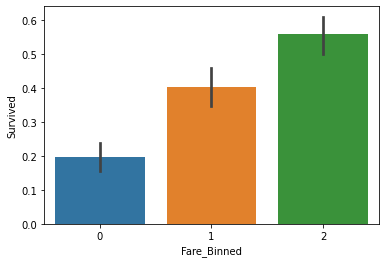

In [93]:
sns.barplot(train_data.Fare_Binned,train_data.Survived)

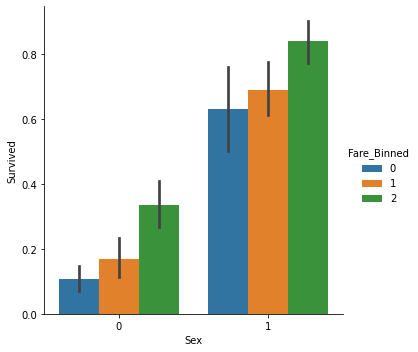

In [94]:
sns.catplot(x='Sex',y='Survived',hue='Fare_Binned',kind='bar',data=train_data)

In [95]:
train_data.drop(columns=['PassengerId','Pclass','Name','Ticket'],inplace=True)

In [96]:
test_data.drop(columns=['PassengerId','Pclass','Name','Ticket'],inplace=True)

In [97]:
train_data.corr()

,Survived,Sex,Age,SibSp,Parch,Cabin,Embarked,P_1,P_2,P_3,Friends,alone
Survived,1.000000,0.543351,-0.046674,-0.035322,0.081629,-0.156799,0.113083,0.285904,0.093349,-0.322308,0.064962,-0.235214
Sex,0.543351,1.000000,-0.050193,0.114631,0.245489,-0.058498,0.123271,0.098013,0.064746,-0.137143,0.176548,-0.314259
Age,-0.046674,-0.050193,1.000000,-0.237168,-0.138020,-0.239307,-0.009387,0.305342,0.007165,-0.268915,-0.203110,0.124805
SibSp,-0.035322,0.114631,-0.237168,1.000000,0.414838,0.035790,-0.062233,-0.054582,-0.055932,0.092548,0.727331,-0.477216
Parch,0.081629,0.245489,-0.138020,0.414838,1.000000,-0.046498,-0.080858,-0.017633,-0.000734,0.015790,0.638361,-0.476339
Cabin,-0.156799,-0.058498,-0.239307,0.035790,-0.046498,1.000000,-0.004057,-0.722018,0.159988,0.491886,-0.046998,0.169527
Embarked,0.113083,0.123271,-0.009387,-0.062233,-0.080858,-0.004057,1.000000,0.054251,-0.191772,0.109333,-0.071924,0.023186
P_1,0.285904,0.098013,0.305342,-0.054582,-0.017633,-0.722018,0.054251,1.000000,-0.288585,-0.626738,0.062449,-0.212691
P_2,0.093349,0.064746,0.007165,-0.055932,-0.000734,0.159988,-0.191772,-0.288585,1.000000,-0.565210,-0.049877,-0.041679
P_3,-0.322308,-0.137143,-0.268915,0.092548,0.015790,0.491886,0.109333,-0.626738,-0.565210,1.000000,-0.013214,0.217176


In [98]:
y=train_data.Survived
train_data.drop(columns=['Survived'],inplace=True)

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.3,random_state=0)

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(random_state=3,warm_start=True)
clf.fit(x_train,y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [101]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [102]:
clf.score(x_test,y_test)

0.8731343283582089